In [38]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('data/banijay_op1data_content_ratings.csv',compression = 'zip')

In [39]:
df = df.drop(['Unnamed: 0'],inplace = False, axis = 1)

In [40]:
df.head()
# day month

,date,hosts,id,length,start,end,title,summary,keywords,date_time_x,...,Target Group,Broadcast Type,Ratings Type,Kdh%,Kdh000,Zadl%,date_time_y,year,date_time_str_y,date_time_string
0,01-02-2021,"['Hilbrand, Sophie', 'Logtenberg, Hugo']",OP1__________-WON02197428_01_segment,00:21:21,22:20:11:10,22:41:32:12,"Gerard Smetsers, Annelie Jager en Károly Illy ...","De basisscholen mogen weer open, maar dat bete...","['directeur', 'gesloten', 'basisscholen']",2021-02-01 22:20:11.100,...,tot6plus,live/prerecorded uitzendingen,uitzenddag,4.780207,770.139215,14.891998,2021-02-01 22:20:00,2021-02,2021-02-01 22:20:00,2021-02-01 22:20:00
1,01-02-2021,"['Hilbrand, Sophie', 'Logtenberg, Hugo']",OP1__________-WON02197428_01_segment,00:21:21,22:20:11:10,22:41:32:12,"Gerard Smetsers, Annelie Jager en Károly Illy ...","De basisscholen mogen weer open, maar dat bete...","['directeur', 'gesloten', 'basisscholen']",2021-02-01 22:20:11.100,...,tot6plus,live/prerecorded uitzendingen,uitgesteld,0.543840,87.618072,8.321518,2021-02-01 22:20:00,2021-02,2021-02-01 22:20:00,2021-02-01 22:20:00
2,01-02-2021,"['Hilbrand, Sophie', 'Logtenberg, Hugo']",OP1__________-WON02197428_01_segment,00:21:21,22:20:11:10,22:41:32:12,"Gerard Smetsers, Annelie Jager en Károly Illy ...","De basisscholen mogen weer open, maar dat bete...","['directeur', 'gesloten', 'basisscholen']",2021-02-01 22:20:11.100,...,tot6plus,live/prerecorded uitzendingen,totaal,4.883685,786.810563,13.787042,2021-02-01 22:20:00,2021-02,2021-02-01 22:20:00,2021-02-01 22:20:00
3,01-02-2021,"['Hilbrand, Sophie', 'Logtenberg, Hugo']",OP1__________-WON02197428_01_segment,00:21:21,22:20:11:10,22:41:32:12,"Gerard Smetsers, Annelie Jager en Károly Illy ...","De basisscholen mogen weer open, maar dat bete...","['directeur', 'gesloten', 'basisscholen']",2021-02-01 22:20:11.100,...,boodschapper_20_49,live/prerecorded uitzendingen,uitzenddag,1.429438,51.516930,6.057109,2021-02-01 22:20:00,2021-02,2021-02-01 22:20:00,2021-02-01 22:20:00
4,01-02-2021,"['Hilbrand, Sophie', 'Logtenberg, Hugo']",OP1__________-WON02197428_01_segment,00:21:21,22:20:11:10,22:41:32:12,"Gerard Smetsers, Annelie Jager en Károly Illy ...","De basisscholen mogen weer open, maar dat bete...","['directeur', 'gesloten', 'basisscholen']",2021-02-01 22:20:11.100,...,boodschapper_20_49,live/prerecorded uitzendingen,uitgesteld,0.132478,4.774516,1.940924,2021-02-01 22:20:00,2021-02,2021-02-01 22:20:00,2021-02-01 22:20:00


## Target Audience Analysis

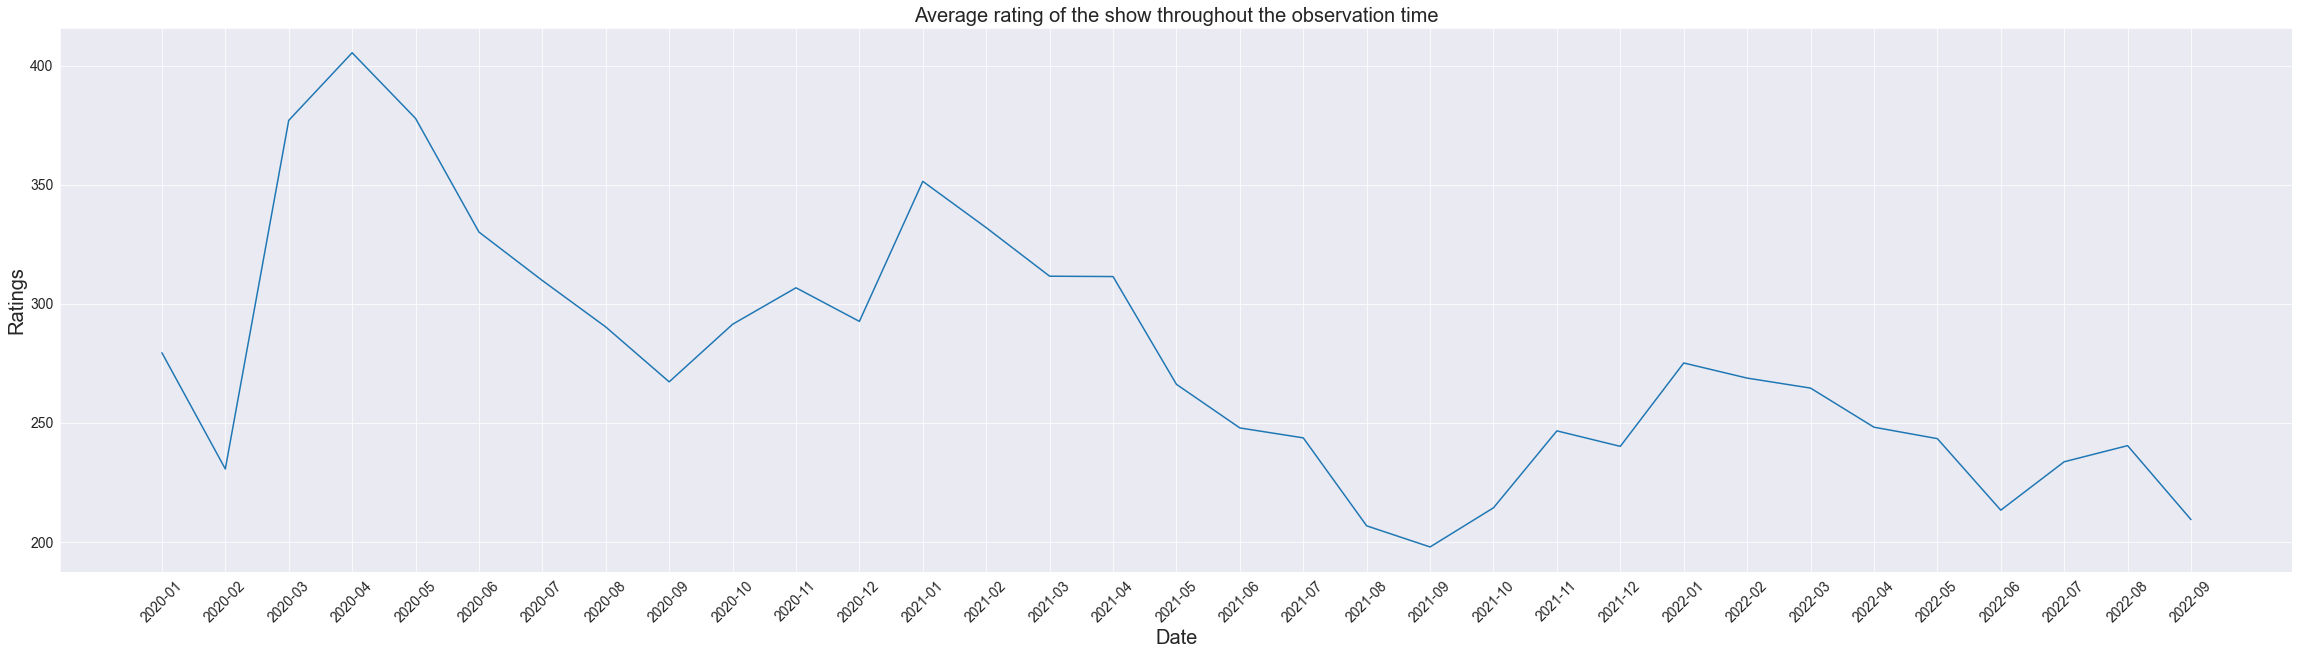

In [50]:
df['year-month'] = df['date'].apply(lambda x: str(x)[6:10] + '-' + str(x)[3:5])
df['year_only'] = df['date'].apply(lambda x: str(x)[6:10])
df_average_for_all_tg_groups = df[df['Ratings Type']== 'totaal'].groupby(['year-month','year_only'],as_index = False)[['Kdh000','Kdh%']].mean()

df_average_for_all_tg_groups.head()



plt.figure(figsize=(40,10))

plt.xticks(rotation = 45, fontsize = 14)
plt.yticks(fontsize = 14)

plt.plot(df_average_for_all_tg_groups['year-month'],df_average_for_all_tg_groups['Kdh000'])


plt.ylabel('Ratings', fontsize = 20)

plt.xlabel('Date', fontsize = 20)

plt.title("Average rating of the show throughout the observation time", fontsize = 20)

plt.savefig('r_d_plot.png',dpi = 600)

plt.show()

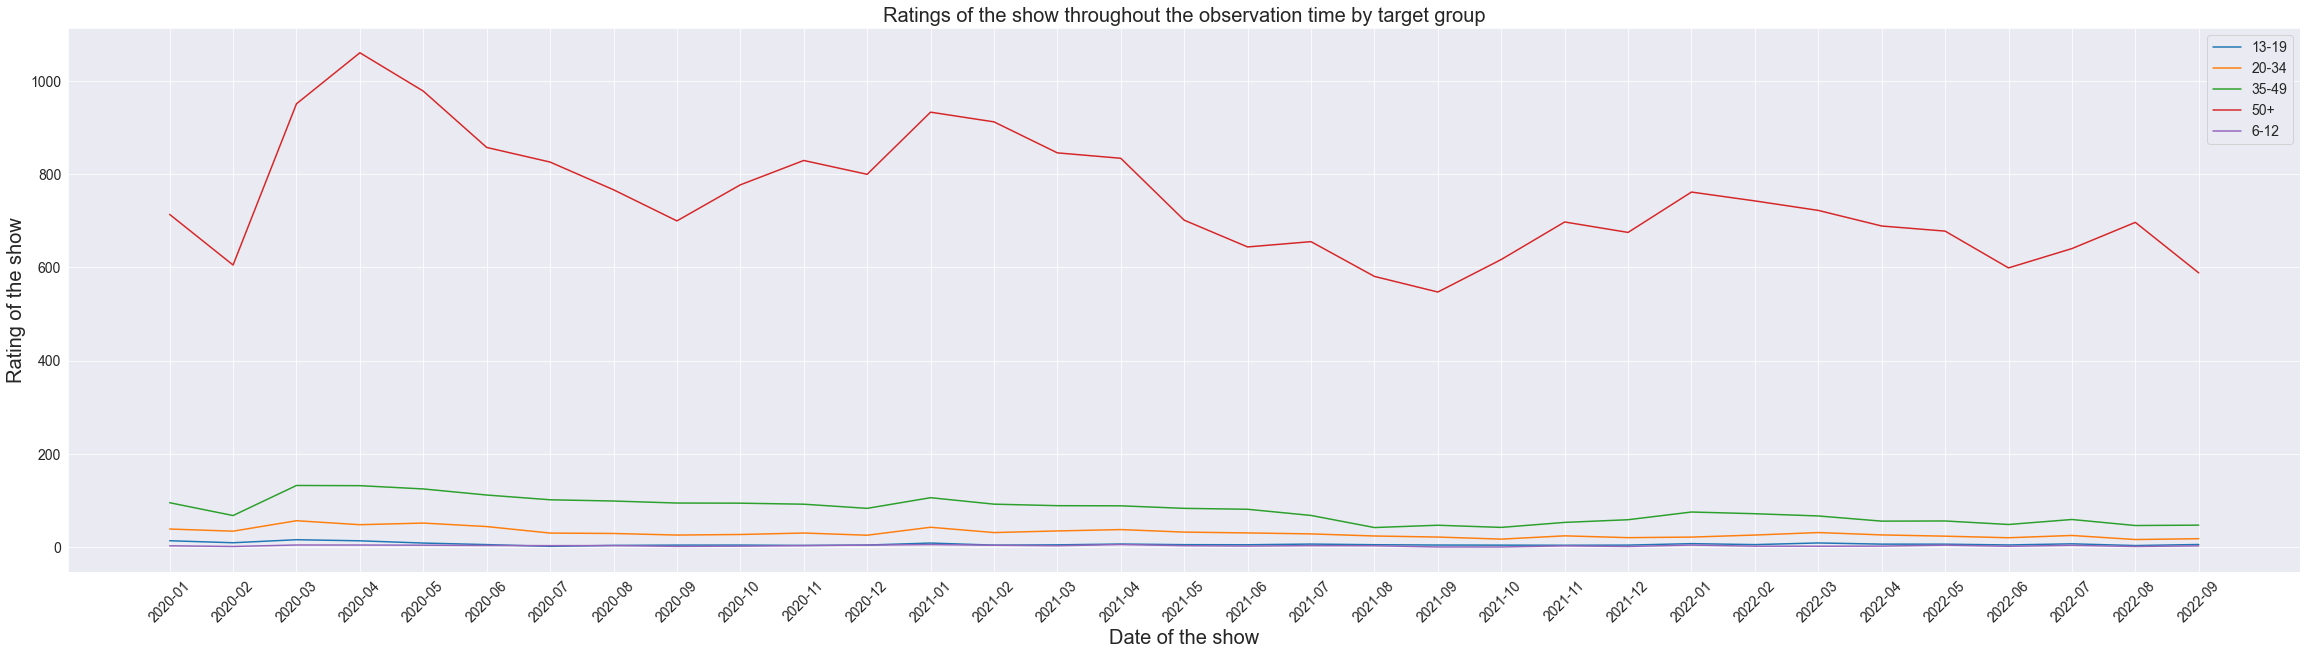

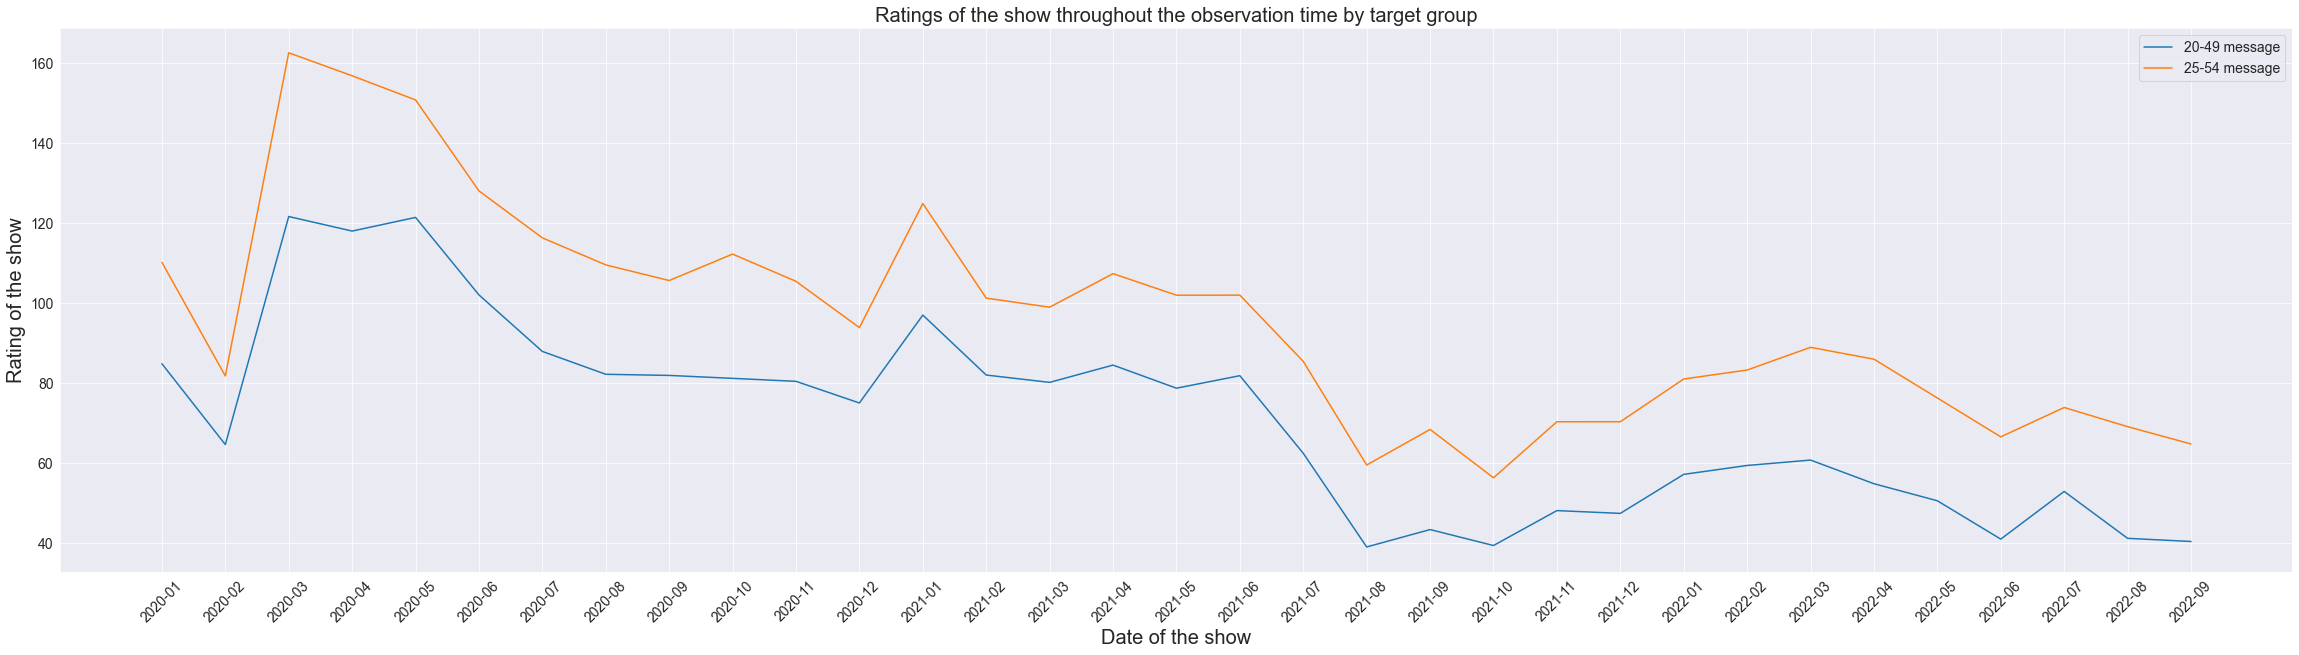

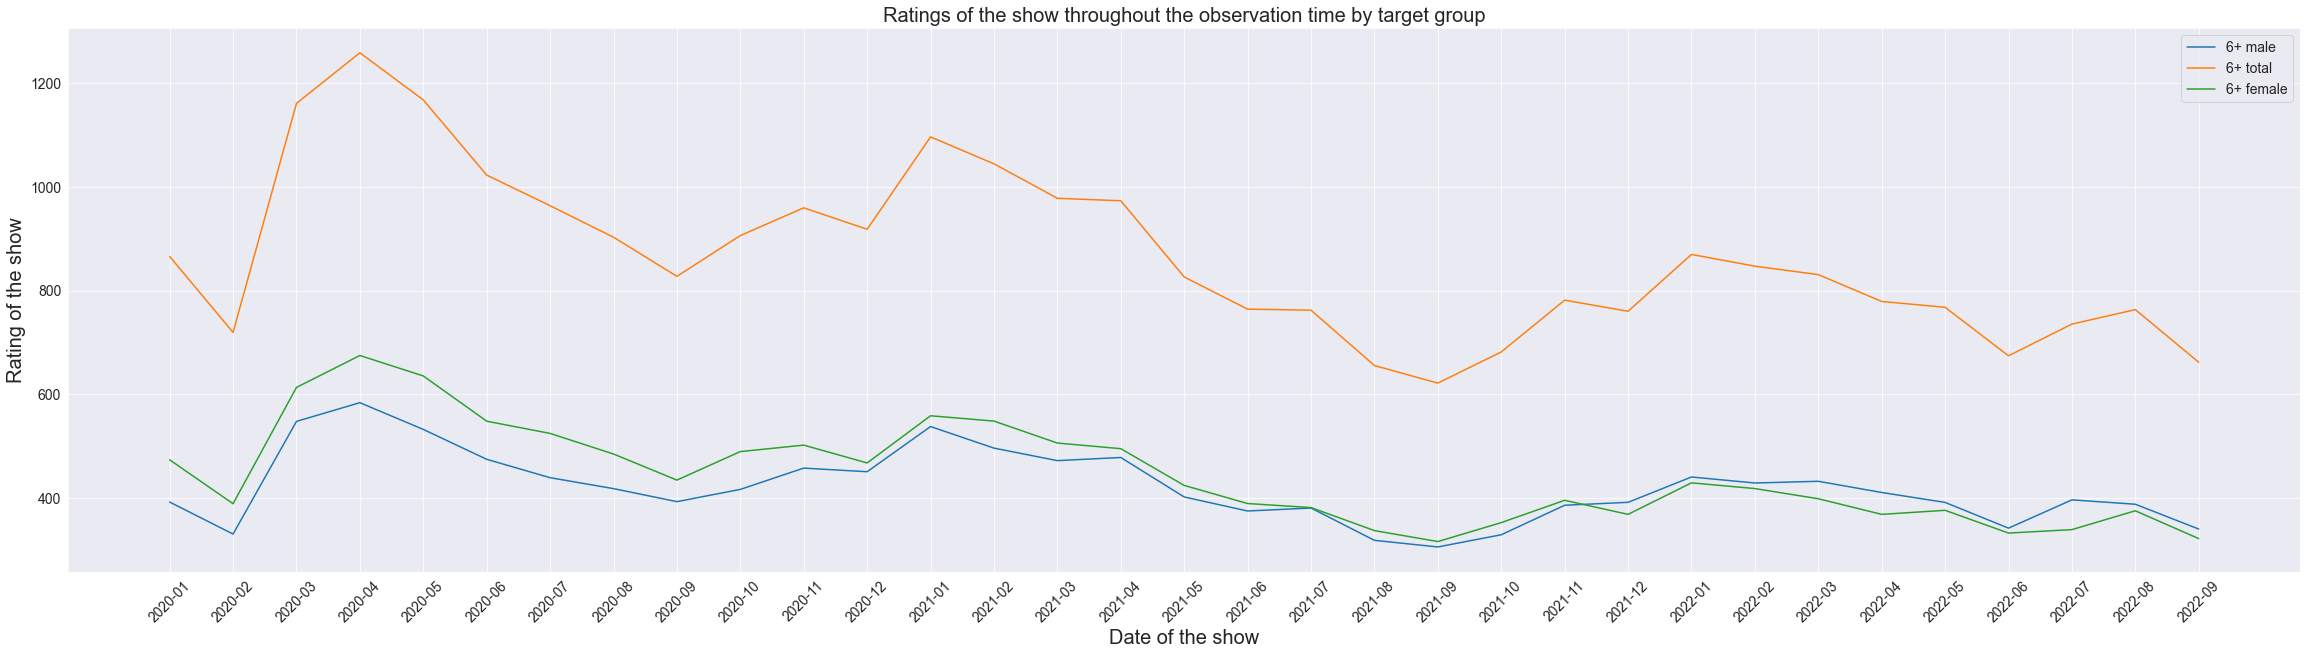

In [46]:
df_average_for_each_tg_groups = df[df['Ratings Type']== 'totaal'].groupby(['year-month','Target Group'],as_index = False)['Kdh000'].mean()

age_dict = {
    '6_12_jr':'6-12',
    '13_19_jr':'13-19',
    '20_34_jr':'20-34',
    '35_49_jr':'35-49',
    '50plus_jr':'50+',
    'boodschapper_20_49':'20-49 message',
    'boodschapper_25_54':'25-54 message',
    'm_6plus_jr':'6+ male',
    'tot6plus':'6+ total',
    'v_6plus_jr':'6+ female'
}

plt.figure(figsize=(40,10))

for group in df_average_for_each_tg_groups['Target Group'][0:5].unique():

    plt.plot(df_average_for_each_tg_groups['year-month'].unique(),df_average_for_each_tg_groups[df_average_for_each_tg_groups['Target Group'] == group]['Kdh000'],label = age_dict.get(group))

plt.xticks(rotation = 45, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Date of the show",fontsize = 20)
plt.ylabel("Rating of the show", fontsize = 20)
plt.title("Ratings of the show throughout the observation time by target group",fontsize = 20)
plt.legend(loc='best',fontsize = 14)

plt.savefig("age_tg.png",dpi = 600)

plt.show()

plt.figure(figsize=(40,10))

for group in df_average_for_each_tg_groups['Target Group'][5:7].unique():
    plt.plot(df_average_for_each_tg_groups['year-month'].unique(),df_average_for_each_tg_groups[df_average_for_each_tg_groups['Target Group'] == group]['Kdh000'],label = age_dict.get(group))

plt.xticks(rotation = 45, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Date of the show",fontsize = 20)
plt.ylabel("Rating of the show", fontsize = 20)
plt.title("Ratings of the show throughout the observation time by target group",fontsize = 20)
plt.legend(loc='best',fontsize = 14)



plt.show()

plt.figure(figsize=(40,10))

for group in df_average_for_each_tg_groups['Target Group'][7:10].unique():
    plt.plot(df_average_for_each_tg_groups['year-month'].unique(),df_average_for_each_tg_groups[df_average_for_each_tg_groups['Target Group'] == group]['Kdh000'],label = age_dict.get(group))

plt.xticks(rotation = 45, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Date of the show",fontsize = 20)
plt.ylabel("Rating of the show", fontsize = 20)
plt.title("Ratings of the show throughout the observation time by target group",fontsize = 20)
plt.legend(loc='best',fontsize = 14)

plt.savefig("gender_tg.png",dpi = 600)

plt.show()



## Target Audience Analysis Conclusion

1. From the line plot, we can see that there is a trend in the rating. At the beginning of the year, the ratings of the show tend to increase and throughout the year there is a drastic decrease in the popularity of the show. Unfortunately, the yearly decrease is greater than the increase in the ratings which is why in the last 3 years the popularity of the show decreased.
2. There was a spike in the show's ratings. I think it is related to the COVID-19 outbreak and the release of the special episodes.
3. To better understand the ratings, I decided to plot ratings among different age groups. As we can see, older people mainly watch this show. Also, there is no difference in the interest in the show between women and men, which is a great sign.

To sum up this part of my Explaratory Analysis, I'd like to say that from first sight, Banijay needs to increase popularity among younger generations by telling stories related to everyday life. As I have already mentioned, women and men have the same interest in the show, making it easier to increase the show's ratings, as Banijay do not have to change the whole concept to attract either men or women.

## Content Analysis

In [25]:
df_hosts_rating = df[df['Ratings Type'] == 'totaal'].groupby(['hosts'], as_index = False)['Kdh000'].mean()
df_hosts_rating =  df_hosts_rating.sort_values(by = ['Kdh000'], ascending=False)
df_hosts_rating = df_hosts_rating.reset_index()
df_hosts_rating = df_hosts_rating.drop('index',axis = 1)

df_hosts_rating.head()

for pos, row in df_hosts_rating.iterrows():
    if pos > 4:
        break
    else:
        hosts = row['hosts'].replace('[','')
        hosts = hosts.replace(']','')
        hosts = hosts.replace("'",'')
        print('The top {0} hosts team is {1} with the average rating of {2}.'.format(pos+1,hosts,row['Kdh000']))




The top 1 hosts team is Pauw, Jeroen, Ekiz, Fidan with the average rating of 451.1538566904605.
The top 2 hosts team is Napel, Carrie ten, Groenhuijsen, Charles, Sijtsma, Welmoed with the average rating of 450.89120318235297.
The top 3 hosts team is Ekiz, Fidan, Pauw, Jeroen with the average rating of 443.36266281100325.
The top 4 hosts team is Ostiana, Giovanca, Brink, Tijs van den, Fikse, Margje with the average rating of 442.91306596862745.
The top 5 hosts team is Sijtsma, Welmoed, Groenhuijsen, Charles with the average rating of 419.1786952978723.


In [26]:
df['show_id'] = df['content_id'].apply(lambda x: str(x)[0:11])
df['fragment'] = df['content_id'].apply(lambda x: str(x)[12:14])

df_most_highly_rated_shows = df[['Kdh000','date_time_start_string','show_id','fragment','Ratings Type']]

df_most_highly_rated_shows = df_most_highly_rated_shows[df_most_highly_rated_shows['Ratings Type'] == 'totaal'].groupby('show_id',as_index = False)['Kdh000'].mean()

df_most_highly_rated_shows = df_most_highly_rated_shows.sort_values(by = 'Kdh000',ascending = False)

df_top_5 = df_most_highly_rated_shows[0:5]

df_bot_5 = df_most_highly_rated_shows[-6:-1]

def get_date_time(show_id):
    return list(df[df['show_id'] == show_id]['date_time_start_string'])[0]

df_top_5['date-time'] = [get_date_time(value) for value in df_top_5['show_id']]
df_top_5 = df_top_5.reset_index()

df_bot_5['date-time'] = [get_date_time(value) for value in df_bot_5['show_id']]
df_bot_5 = df_bot_5.reset_index()



for pos, row in df_top_5.iterrows():
    print('The top {0} show was presented on {1} with the average rating of {2}. \n'.format(pos+1,row['date-time'],row['Kdh000']))



for pos, row in df_bot_5.iterrows():
    print('The {0} least popular show was presented on {1} with the average rating of {2}. \n'.format(pos+1,row['date-time'],row['Kdh000']))


/var/folders/7x/pkl50ghj76g8t2s0y2s5bcrw0000gn/T/ipykernel_34485/4100257662.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_5['date-time'] = [get_date_time(value) for value in df_top_5['show_id']]


The top 1 show was presented on 2020-03-22 22:20:00 with the average rating of 670.4866967081633. 

The top 2 show was presented on 2021-01-24 22:03:00 with the average rating of 570.1154642630435. 

The top 3 show was presented on 2021-02-07 22:12:00 with the average rating of 550.5395208. 

The top 4 show was presented on 2021-01-06 22:32:00 with the average rating of 531.0285405292308. 

The top 5 show was presented on 2020-05-17 22:17:00 with the average rating of 513.7316649945454. 

The 1 least popular show was presented on 2021-09-03 22:55:00 with the average rating of 141.9666168904762. 

The 2 least popular show was presented on 2021-09-01 22:39:00 with the average rating of 141.72656582978723. 

The 3 least popular show was presented on 2022-06-14 22:05:00 with the average rating of 116.94650312363638. 

The 4 least popular show was presented on 2021-09-15 22:37:00 with the average rating of 114.70799893181818. 

The 5 least popular show was presented on 2021-10-01 23:00:00 w

/var/folders/7x/pkl50ghj76g8t2s0y2s5bcrw0000gn/T/ipykernel_34485/4100257662.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bot_5['date-time'] = [get_date_time(value) for value in df_bot_5['show_id']]


In [27]:
df_most_highly_rated_shows_w_fragment = df[['Kdh000','date_time_start_string','content_id','Ratings Type','keywords']]

df_most_highly_rated_shows_w_fragment =  df_most_highly_rated_shows_w_fragment[df_most_highly_rated_shows_w_fragment['Ratings Type'] == 'totaal']

df_most_highly_rated_shows_w_fragment = df_most_highly_rated_shows_w_fragment.groupby(['content_id'],as_index=False)['Kdh000'].mean()

df_most_highly_rated_shows_w_fragment = df_most_highly_rated_shows_w_fragment.sort_values(by = 'Kdh000', ascending=False)

df_most_highly_rated_shows_w_fragment['show_id'] = df_most_highly_rated_shows_w_fragment['content_id'].apply(lambda x: str(x)[0:11])

show_id_list = df_top_5['show_id'].values

df_most_highly_rated_shows_w_fragment = df_most_highly_rated_shows_w_fragment[df_most_highly_rated_shows_w_fragment['show_id'].isin(show_id_list)]


df_most_highly_rated_shows_w_fragment = df_most_highly_rated_shows_w_fragment.drop_duplicates(subset='show_id')

def get_key_words(content_id):
    return list(df[df['content_id'] == content_id]['keywords'])[0]

df_most_highly_rated_shows_w_fragment['keywords'] = [get_key_words(value) for value in df_most_highly_rated_shows_w_fragment['content_id']]

df_most_highly_rated_shows_w_fragment.head()

,content_id,Kdh000,show_id,keywords
217,WON02099483_01,679.144227,WON02099483,"['43', 'politiecommandant', 'coronavirus']"
1143,WON02190071_01,615.007254,WON02190071,"['deskundigen', 'zetels', 'georgia']"
1200,WON02195550_01,606.090913,WON02195550,"['beëindigd', 'coronamaatregelen', 'amsterdam']"
1250,WON02198835_03,598.575378,WON02198835,"['directeur', 'historische', 'sneeuwbeelden']"
464,WON02117988_01,547.640186,WON02117988,"['combinatie', 'gezondheidszorg', 'limburgse']"


In [28]:
df_least_highly_rated_shows_w_fragment = df[['Kdh000','date_time_start_string','content_id','Ratings Type','keywords']]

df_least_highly_rated_shows_w_fragment =  df_least_highly_rated_shows_w_fragment[df_least_highly_rated_shows_w_fragment['Ratings Type'] == 'totaal']

df_least_highly_rated_shows_w_fragment = df_least_highly_rated_shows_w_fragment.groupby(['content_id'],as_index=False)['Kdh000'].mean()

df_least_highly_rated_shows_w_fragment = df_least_highly_rated_shows_w_fragment.sort_values(by = 'Kdh000', ascending=True)

df_least_highly_rated_shows_w_fragment['show_id'] = df_least_highly_rated_shows_w_fragment['content_id'].apply(lambda x: str(x)[0:11])

show_id_bot_list = df_bot_5['show_id'].values

df_least_highly_rated_shows_w_fragment = df_least_highly_rated_shows_w_fragment[df_least_highly_rated_shows_w_fragment['show_id'].isin(show_id_bot_list)]


df_least_highly_rated_shows_w_fragment = df_least_highly_rated_shows_w_fragment.drop_duplicates(subset='show_id')

def get_key_words(content_id):
    return list(df[df['content_id'] == content_id]['keywords'])[0]

df_least_highly_rated_shows_w_fragment['keywords'] = [get_key_words(value) for value in df_least_highly_rated_shows_w_fragment['content_id']]

df_least_highly_rated_shows_w_fragment.head()

,content_id,Kdh000,show_id,keywords
1859,WON02259571_02,78.470929,WON02259571,"['nieuwe', 'films', 'michael']"
2625,WON02323531_01,85.442815,WON02323531,"['gasten', 'tafel', 'nieuws']"
1822,WON02254723_03,102.172176,WON02254723,"['oorsprong', 'wetenschapsjournalist', 'verand..."
1794,WON02252089_03,119.089461,WON02252089,"['nummer', 'tweejarige', 'flex']"
1787,WON02251589_04,131.661194,WON02251589,"['populair', 'teamleider', 'realistisch']"


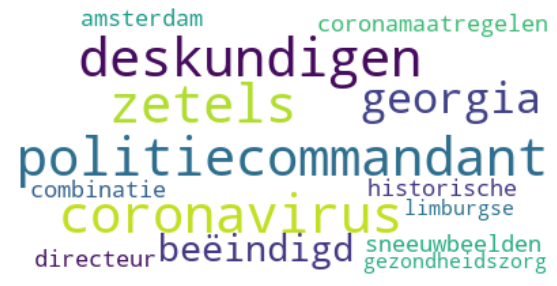

In [29]:
from wordcloud import WordCloud

all_keywords_highly_rated = []

for pos, row in df_most_highly_rated_shows_w_fragment.iterrows():
    keyword_final = ""
    for sign in row['keywords']:
        exceptions = ['[',"'",']',' ']
        if sign == ',':
            all_keywords_highly_rated.append(keyword_final)
            keyword_final = ''
        elif sign not in exceptions:
            keyword_final += sign

    all_keywords_highly_rated.append(keyword_final)

cloud_text = ' '.join(all_keywords_highly_rated)

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(cloud_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

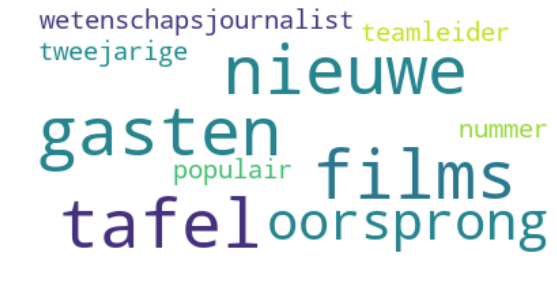

In [30]:
all_keywords_low_rated = []

for pos, row in df_least_highly_rated_shows_w_fragment.iterrows():
    keyword_final = ""
    for sign in row['keywords']:
        exceptions = ['[',"'",']',' ']
        if sign == ',':
            all_keywords_low_rated.append(keyword_final)
            keyword_final = ''
        elif sign not in exceptions:
            keyword_final += sign

    all_keywords_highly_rated.append(keyword_final)

cloud_text = ' '.join(all_keywords_low_rated)

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(cloud_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## Content Analysis Conclusion

1. Looking at the top 5 host teams, we can see a leading group of 4 hosting teams with an average score greater than 440. Another team have a rating of 420, which is still a great result. I suggest using these five teams weekly to increase the popularity. As there presence influence the ratings of the show greatly.
2. As we can see from the data, the top 5 shows were all presented in the first half of the year; at the same, the least popular shows were introduced in the last three months of the year. This is an interesting pattern which I would suggest exploring and finding out why people are more interested in the show at the beginning of the year.
3. After looking at the show's most popular fragments, it's clear that the first three parts are usually rated higher than any other fragments. It might happen because of the lack of good content in the show, so people get bored after watching 2-3 fragments. To increase ratings it might be helpful to work on the content and attract viewers throughout the whole show.
4. In the images on top, you can see word cloud for both the most popular and least popular shows; working with this data can help to increase ratings.

To sum up this part of my Exploratory Analysis, I'd like to say that there are several worth mentioning patterns. Exploring trends throughout the year and finding out why people prefer the show more at the beginning of the year than at the end might help transform the show and make it better. An increase in the amount of content through the show will also help increase its popularity.

## Trend Analysis

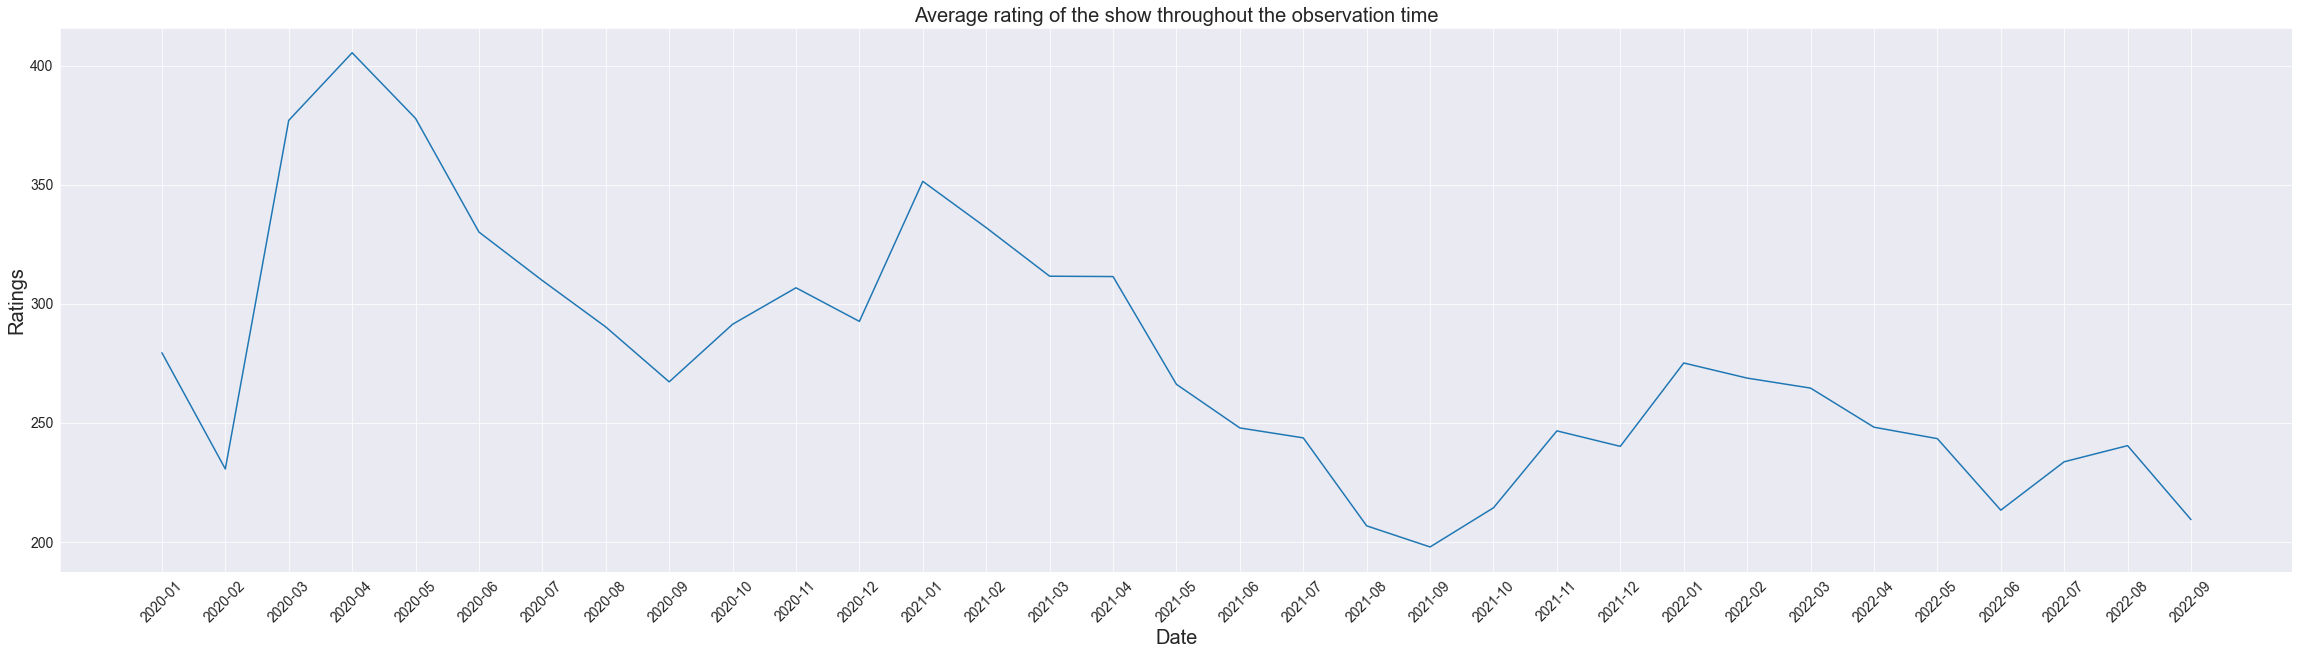

In [51]:
df_trends_analysis = df

df_trends_analysis['date'] = df_trends_analysis['date'].apply(lambda x: pd.to_datetime(x,format='%d-%M-%Y'))
df_trends_analysis['day_name'] = df_trends_analysis['date'].apply(lambda x: x.day_name())
df_trends_analysis['day_num'] = df_trends_analysis['date'].apply(lambda x: x.dayofweek)

df_trends_average_for_all_tg_groups = df_trends_analysis[df_trends_analysis['Ratings Type']== 'totaal'].groupby('year-month',as_index = False)['Kdh000'].mean()

plt.rcParams['figure.figsize'] = [40, 10]

plt.xticks(rotation = 45, fontsize = 14)
plt.yticks(fontsize = 14)

plt.plot(df_average_for_all_tg_groups['year-month'],df_average_for_all_tg_groups['Kdh000'])


plt.ylabel('Ratings', fontsize = 20)

plt.xlabel('Date', fontsize = 20)

plt.title("Average rating of the show throughout the observation time", fontsize = 20)



plt.show()

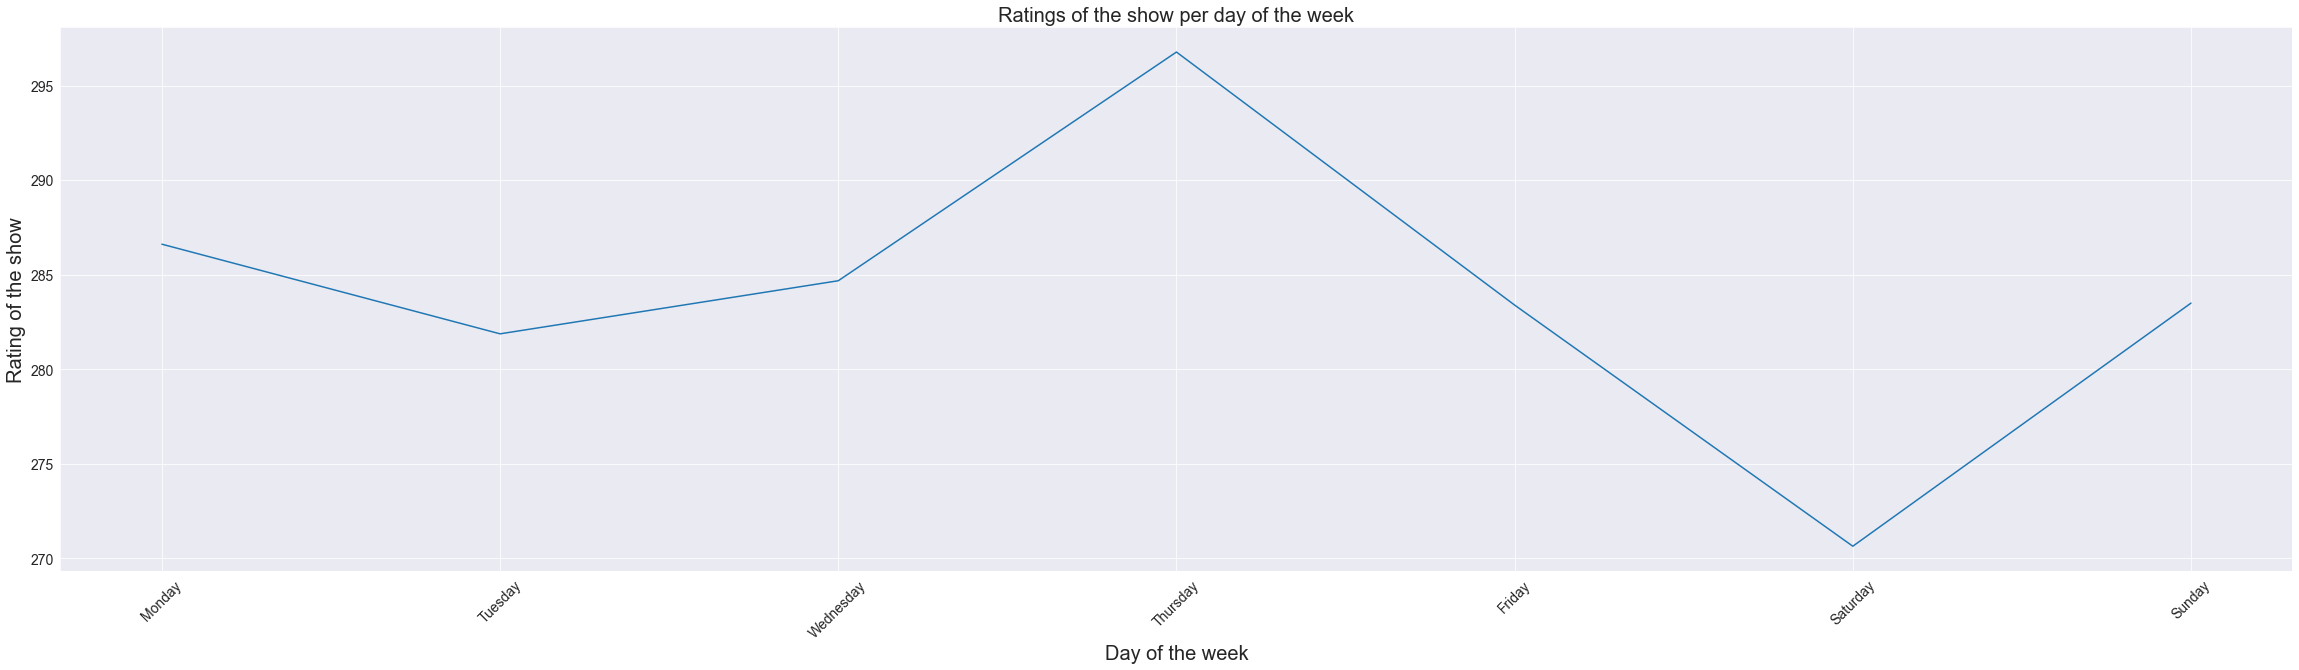

In [57]:
df_trends_average_for_all_tg_groups_days = df_trends_analysis[df_trends_analysis['Ratings Type']== 'totaal'].groupby(['day_name','day_num'],as_index = False)['Kdh000'].mean()

df_trends_average_for_all_tg_groups_days = df_trends_average_for_all_tg_groups_days.sort_values(by='day_num',ascending=True)

plt.rcParams['figure.figsize'] = [40, 10]

plt.xticks(rotation = 45, fontsize = 14)
plt.yticks(fontsize = 14)


plt.plot(df_trends_average_for_all_tg_groups_days['day_name'], df_trends_average_for_all_tg_groups_days['Kdh000'])
plt.xlabel("Day of the week", fontsize = 20)
plt.ylabel("Rating of the show", fontsize = 20)
plt.title("Ratings of the show per day of the week", fontsize = 20)

plt.savefig("r_per_day.png",dpi = 600)

plt.show()


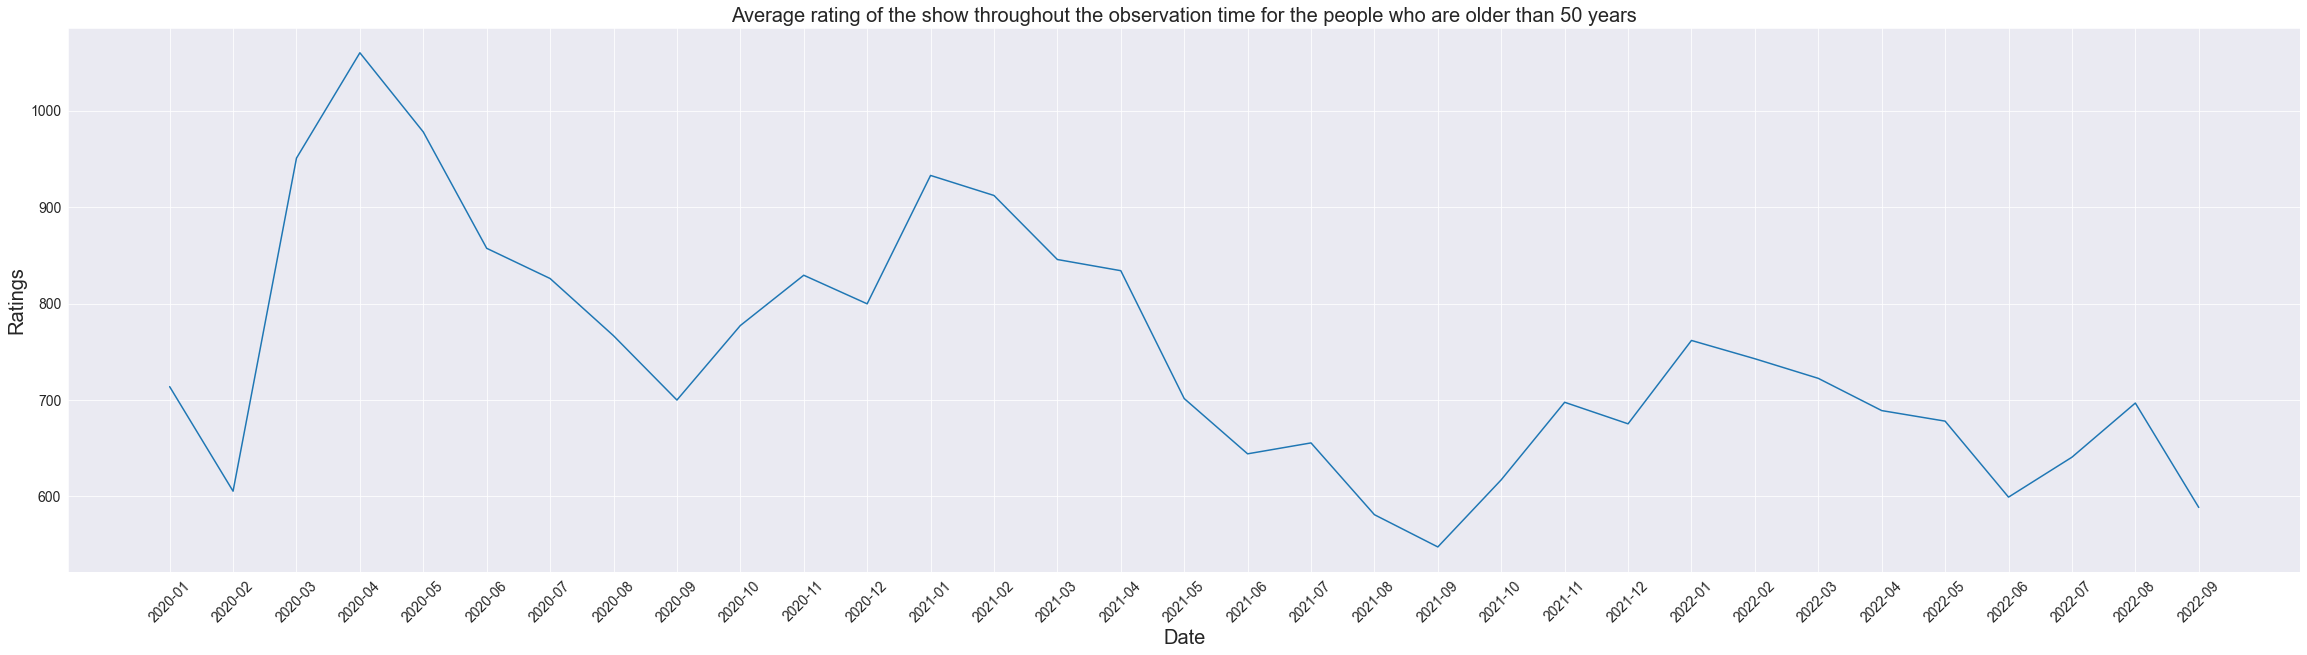

In [55]:
df_trends_analysis_50_plus = df_trends_analysis[df_trends_analysis['Target Group'] == '50plus_jr']


df_trends_analysis_50_plus_all_tg_groups = df_trends_analysis_50_plus[df_trends_analysis_50_plus['Ratings Type']== 'totaal'].groupby('year-month',as_index = False)['Kdh000'].mean()

plt.rcParams['figure.figsize'] = [40, 10]

plt.xticks(rotation = 45, fontsize = 14)
plt.yticks(fontsize = 14)

plt.plot(df_trends_analysis_50_plus_all_tg_groups['year-month'],df_trends_analysis_50_plus_all_tg_groups['Kdh000'])

plt.ylabel('Ratings', fontsize = 20)

plt.xlabel('Date', fontsize = 20)

plt.title("Average rating of the show throughout the observation time for the people who are older than 50 years", fontsize = 20)

plt.show()


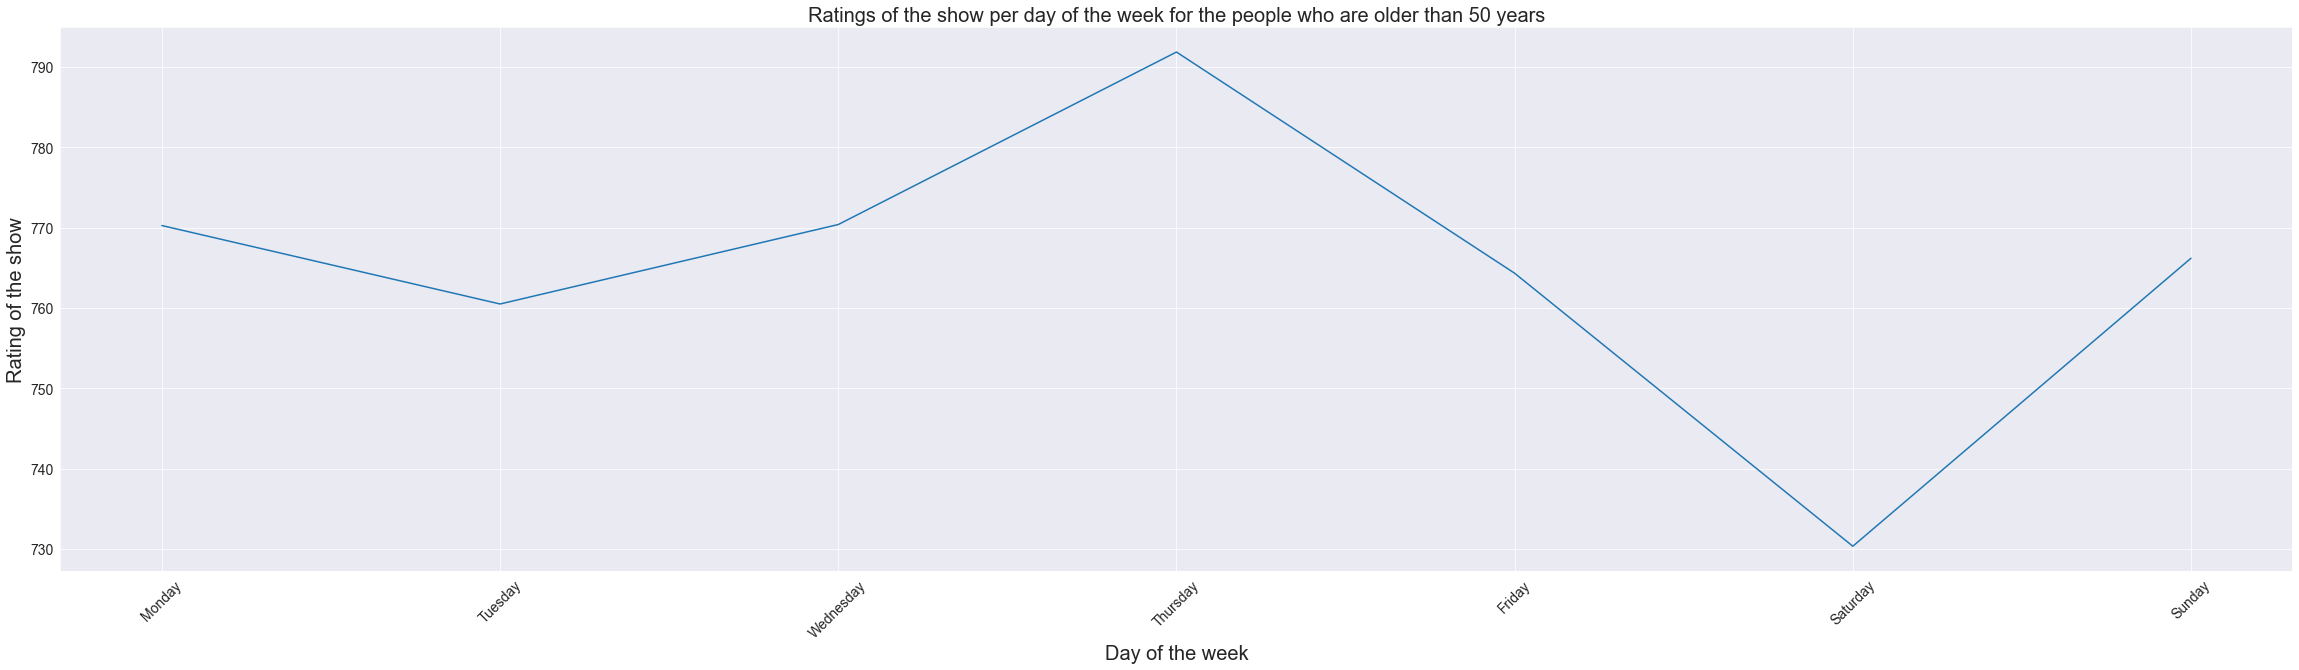

In [58]:
df_trends_analysis_50_plus_average_days = df_trends_analysis_50_plus[df_trends_analysis_50_plus['Ratings Type']== 'totaal'].groupby(['day_name','day_num'],as_index = False)['Kdh000'].mean()

df_trends_analysis_50_plus_average_days = df_trends_analysis_50_plus_average_days.sort_values(by='day_num',ascending=True)

plt.rcParams['figure.figsize'] = [40, 10]


plt.xticks(rotation = 45, fontsize = 14)
plt.yticks(fontsize = 14)

plt.plot(df_trends_analysis_50_plus_average_days['day_name'], df_trends_analysis_50_plus_average_days['Kdh000'])

plt.xlabel("Day of the week", fontsize = 20)
plt.ylabel("Rating of the show", fontsize = 20)
plt.title("Ratings of the show per day of the week for the people who are older than 50 years", fontsize = 20)

plt.savefig("r_per_day.png",dpi = 600)
plt.show()


## Trend Analysis Conclusion

1. As I already mentioned in the Target Audience Analysis, there is a trend in the show ratings, which resulted in its popularity decrease.
2. From the line plot, it is clear that the best and the most watched episodes are released on Monday, Thursday and Sunday.
3. From the visualizations in the Target Audience Analysis, it is clear that this show is mainly favoured by elderly people who are over 50 years.
4. By looking at the Target Group "50plus_jr" with the highest ratings we can see that the trends are the same as for the entire show. The only difference that we can spot from visualizations is the average rating score.

To sum up this part of my Exploratory Analysis, I'd like to point out that Banijay should work with the content to increase popularity among younger generations. What is more, the show is only favoured for three days a week, this pattern should be later explored. By improving day-to-day performance, ratings will also increase.
